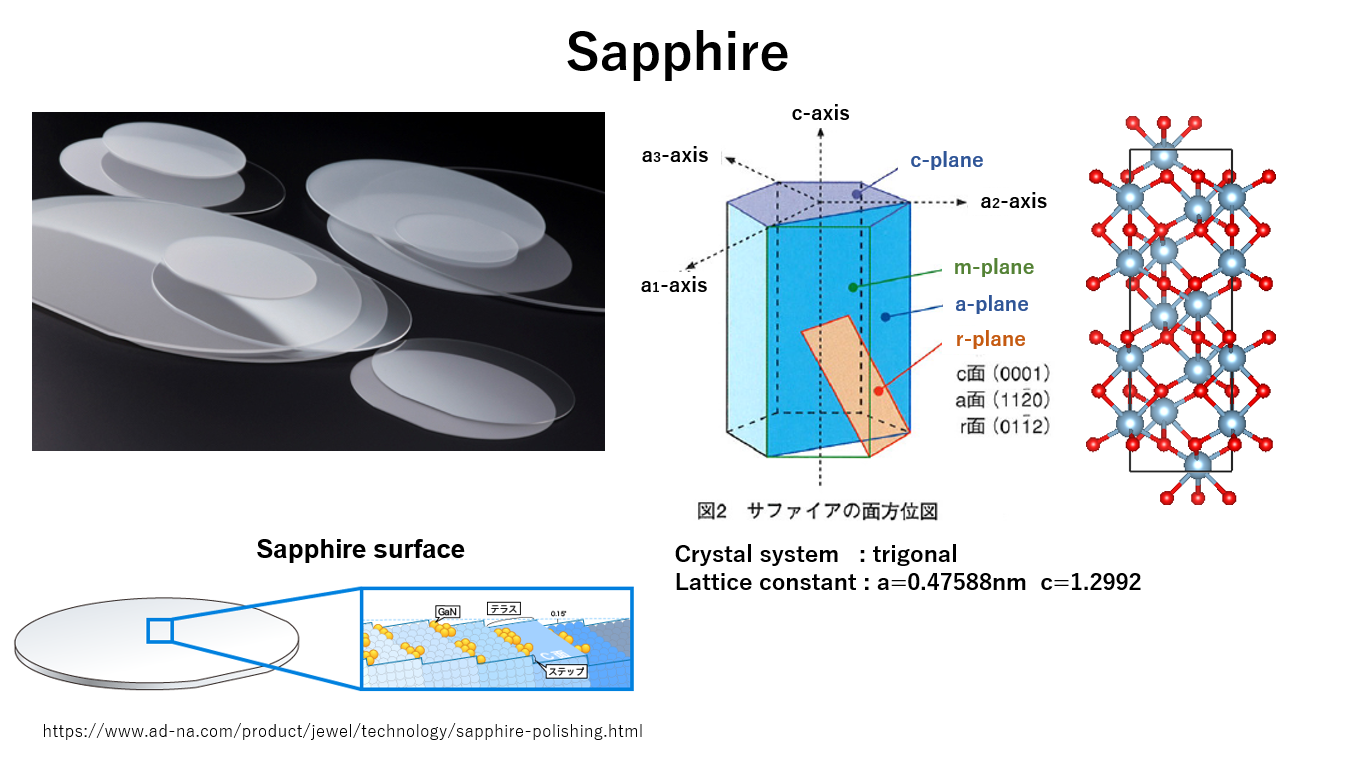

In [1]:
# possible import
# https://downloads.ccdc.cam.ac.uk/documentation/API/descriptive_docs/crystal.html

# https://docs.pybinding.site/en/stable/intro.html

In [2]:
import numpy as np

In [3]:
import pymatgen

In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.graph_objects as go

In [6]:
from itertools import permutations, combinations

# Cif - Pymatgen

In [7]:
ls data/cif

 alpha-Fe2O3_mp-19770_conventional_standard.cif
 Fe2O3_mp-1068212_conventional_standard.cif
 Fe2O3_mp-1078361_conventional_standard.cif
 Fe2O3_mp-1205415_conventional_standard.cif
 Fe2O3_mp-1456_conventional_standard.cif
'Fe2O3_mp-19770_conventional_standard (1).cif'
 Fe2O3_mp-19770_conventional_standard.cif
 Fe2O3_mp-510080_conventional_standard.cif
 Fe2O3_mp-542896_conventional_standard.cif
 Fe2O3_mp-557546_conventional_standard.cif
 Fe2O3_mp-565814_conventional_standard.cif


In [8]:
import pymatgen.core.structure as pystructure

In [9]:
from pymatgen import Lattice, Structure, Molecule

## Load data

In [10]:
Fe2O3 = Structure.from_file("data/cif/alpha-Fe2O3_mp-19770_conventional_standard.cif")

/home/aurora/anaconda3/envs/fastai/lib/python3.7/site-packages/pymatgen/io/cif.py:1122: UserWarning:

Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.



In [11]:
Fe2O3.lattice

Lattice
    abc : 5.13754442 5.13754442 13.83706043
 angles : 90.0 90.0 119.99999999999999
 volume : 316.29013679493784
      A : 5.13754442 0.0 3.145838664715173e-16
      B : -2.568772209999999 4.449243980790991 3.145838664715173e-16
      C : 0.0 0.0 13.83706043

In [12]:
lattice = Fe2O3.lattice

## how permuation works

In [13]:
list( permutations((1, 2, 3)) )

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

## Pymatgen structure API

In [14]:
lattice.d_hkl((0,0,1))

13.837060430000001

In [15]:
nbrs = Fe2O3.get_all_neighbors(5)

In [16]:
dm = Fe2O3.distance_matrix

In [17]:
dm.shape

(30, 30)

In [18]:
reci_lattice = lattice.reciprocal_lattice

In [19]:
reci_lattice

Lattice
    abc : 1.412191674429721 1.412191674429721 0.4540838235812768
 angles : 90.00000000000001 90.00000000000001 60.00000000000002
 volume : 0.784248968228871
      A : 1.2229938650690217 0.7060958372148601 0.0
      B : 0.0 1.412191674429721 0.0
      C : -2.7804615054670105e-17 -4.8159005959583104e-17 0.4540838235812768

In [20]:
reci_lattice.matrix

array([[ 1.22299387e+00,  7.06095837e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.41219167e+00,  0.00000000e+00],
       [-2.78046151e-17, -4.81590060e-17,  4.54083824e-01]])

## Compute Reciprocal Lattice and spacing between G

In [21]:
def create_cell_indices(n):
    indices = []
    for i in range(n+1):
        for j in range(i+1):
            for k in range(j+1):
                # print(i,j,k)
                indices+= list(set(permutations((i,j,k)) ))
    return indices

In [22]:
def cell_xyz(lattice, n):
    indices = create_cell_indices(2)
    xyzs = lattice.matrix.T @ np.array( indices ).T
    return indices, xyzs

In [23]:
reci_lattice.matrix.shape

(3, 3)

In [24]:
# reci_indices = create_cell_indices(2)
# xyzs = reci_lattice.matrix.T @ np.array( reci_indices ).T
indices, xyzs = cell_xyz(reci_lattice, 2)

In [25]:
xyzs.shape

(3, 27)

In [26]:
def generate_dGs(lattice, n=2):
    indices, xyzs = cell_xyz(lattice.reciprocal_lattice, n=n)
    possible_dGs = np.linalg.norm(xyzs, axis=0)
    
    return indices, possible_dGs

In [27]:
possible_dGs = np.linalg.norm(xyzs, axis=0) * 10 # in nm^-1

In [28]:
xyzs.shape

(3, 27)

Text(0.5, 0, 'dG ($nm^{-1}$)')

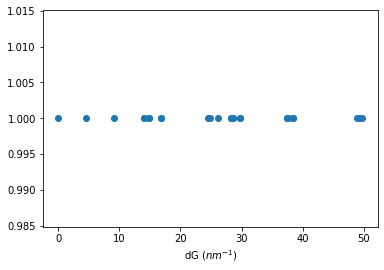

In [29]:
plt.scatter( possible_dGs, np.ones_like(possible_dGs) );
plt.xlabel("dG ($nm^{-1}$)")

## Plot lattice

In [30]:
indices,xyzs = cell_xyz(lattice, 2)

In [31]:
xyzs.shape

(3, 27)

In [32]:
xyzs_min = xyzs.min(axis=1)
xyzs_max=xyzs.max(axis=1)
xyzs_min,xyzs_max

(array([-5.13754442,  0.        ,  0.        ]),
 array([10.27508884,  8.89848796, 27.67412086]))

In [33]:
fig = go.Figure()

fig.add_trace( go.Scatter3d(x=xyzs[0], y=xyzs[1], z=xyzs[2], mode="markers"))

x_scale = 1 
y_scale = (xyzs_max[1] - xyzs_min[1]) / (xyzs_max[0] - xyzs_min[0])
z_scale = (xyzs_max[2] - xyzs_min[2]) / (xyzs_max[0] - xyzs_min[0])

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

# plot reciprocal lattice

In [34]:
indices, xyzs = cell_xyz(reci_lattice, 2)

In [35]:
xyzs.shape

(3, 27)

In [36]:
xyzs_min = xyzs.min(axis=1)
xyzs_max=xyzs.max(axis=1)
xyzs_min,xyzs_max

(array([-5.56092301e-17, -9.63180119e-17,  0.00000000e+00]),
 array([2.44598773, 4.23657502, 0.90816765]))

In [37]:
fig = go.Figure()

fig.add_trace( go.Scatter3d(x=xyzs[0], y=xyzs[1], z=xyzs[2], mode="markers"))

x_scale = 1 
y_scale = (xyzs_max[1] - xyzs_min[1]) / (xyzs_max[0] - xyzs_min[0])
z_scale = (xyzs_max[2] - xyzs_min[2]) / (xyzs_max[0] - xyzs_min[0])

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

## Testing

In [38]:
fig = go.Figure()

hexagonal = np.array([
    [0,0,0],
    [-2,0,0],
    [-1,np.sqrt(3),0],
    [1, np.sqrt(3), 0],
    [2, 0, 0],
    [-1,-np.sqrt(3),0],
    [1,-np.sqrt(3),0],    
])

hexagonal_min = hexagonal.min(axis=0)
hexagonal_max = hexagonal.max(axis=0)

fig.add_trace( go.Scatter3d(x=hexagonal[:,0], y=hexagonal[:,1], z=hexagonal[:,2], mode="markers"))

hexagonal

x_scale = 1 
y_scale = (hexagonal_max[1] - hexagonal_min[1]) / (hexagonal_max[0] - hexagonal_min[0])  
z_scale = 1

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

# fig.update_layout(go.Layout(
#     scene=go.layout.Scene(
#         aspectmode='manual',
#         aspectratio=dict(x=1, y=1, z=0.2)
#     )
# ))

# RHEED result

In [39]:
from IPython.display import display, Image

In [40]:
ls 2d3dprediction/phase

phase_with_intensity.html  phase_with_intensity.png


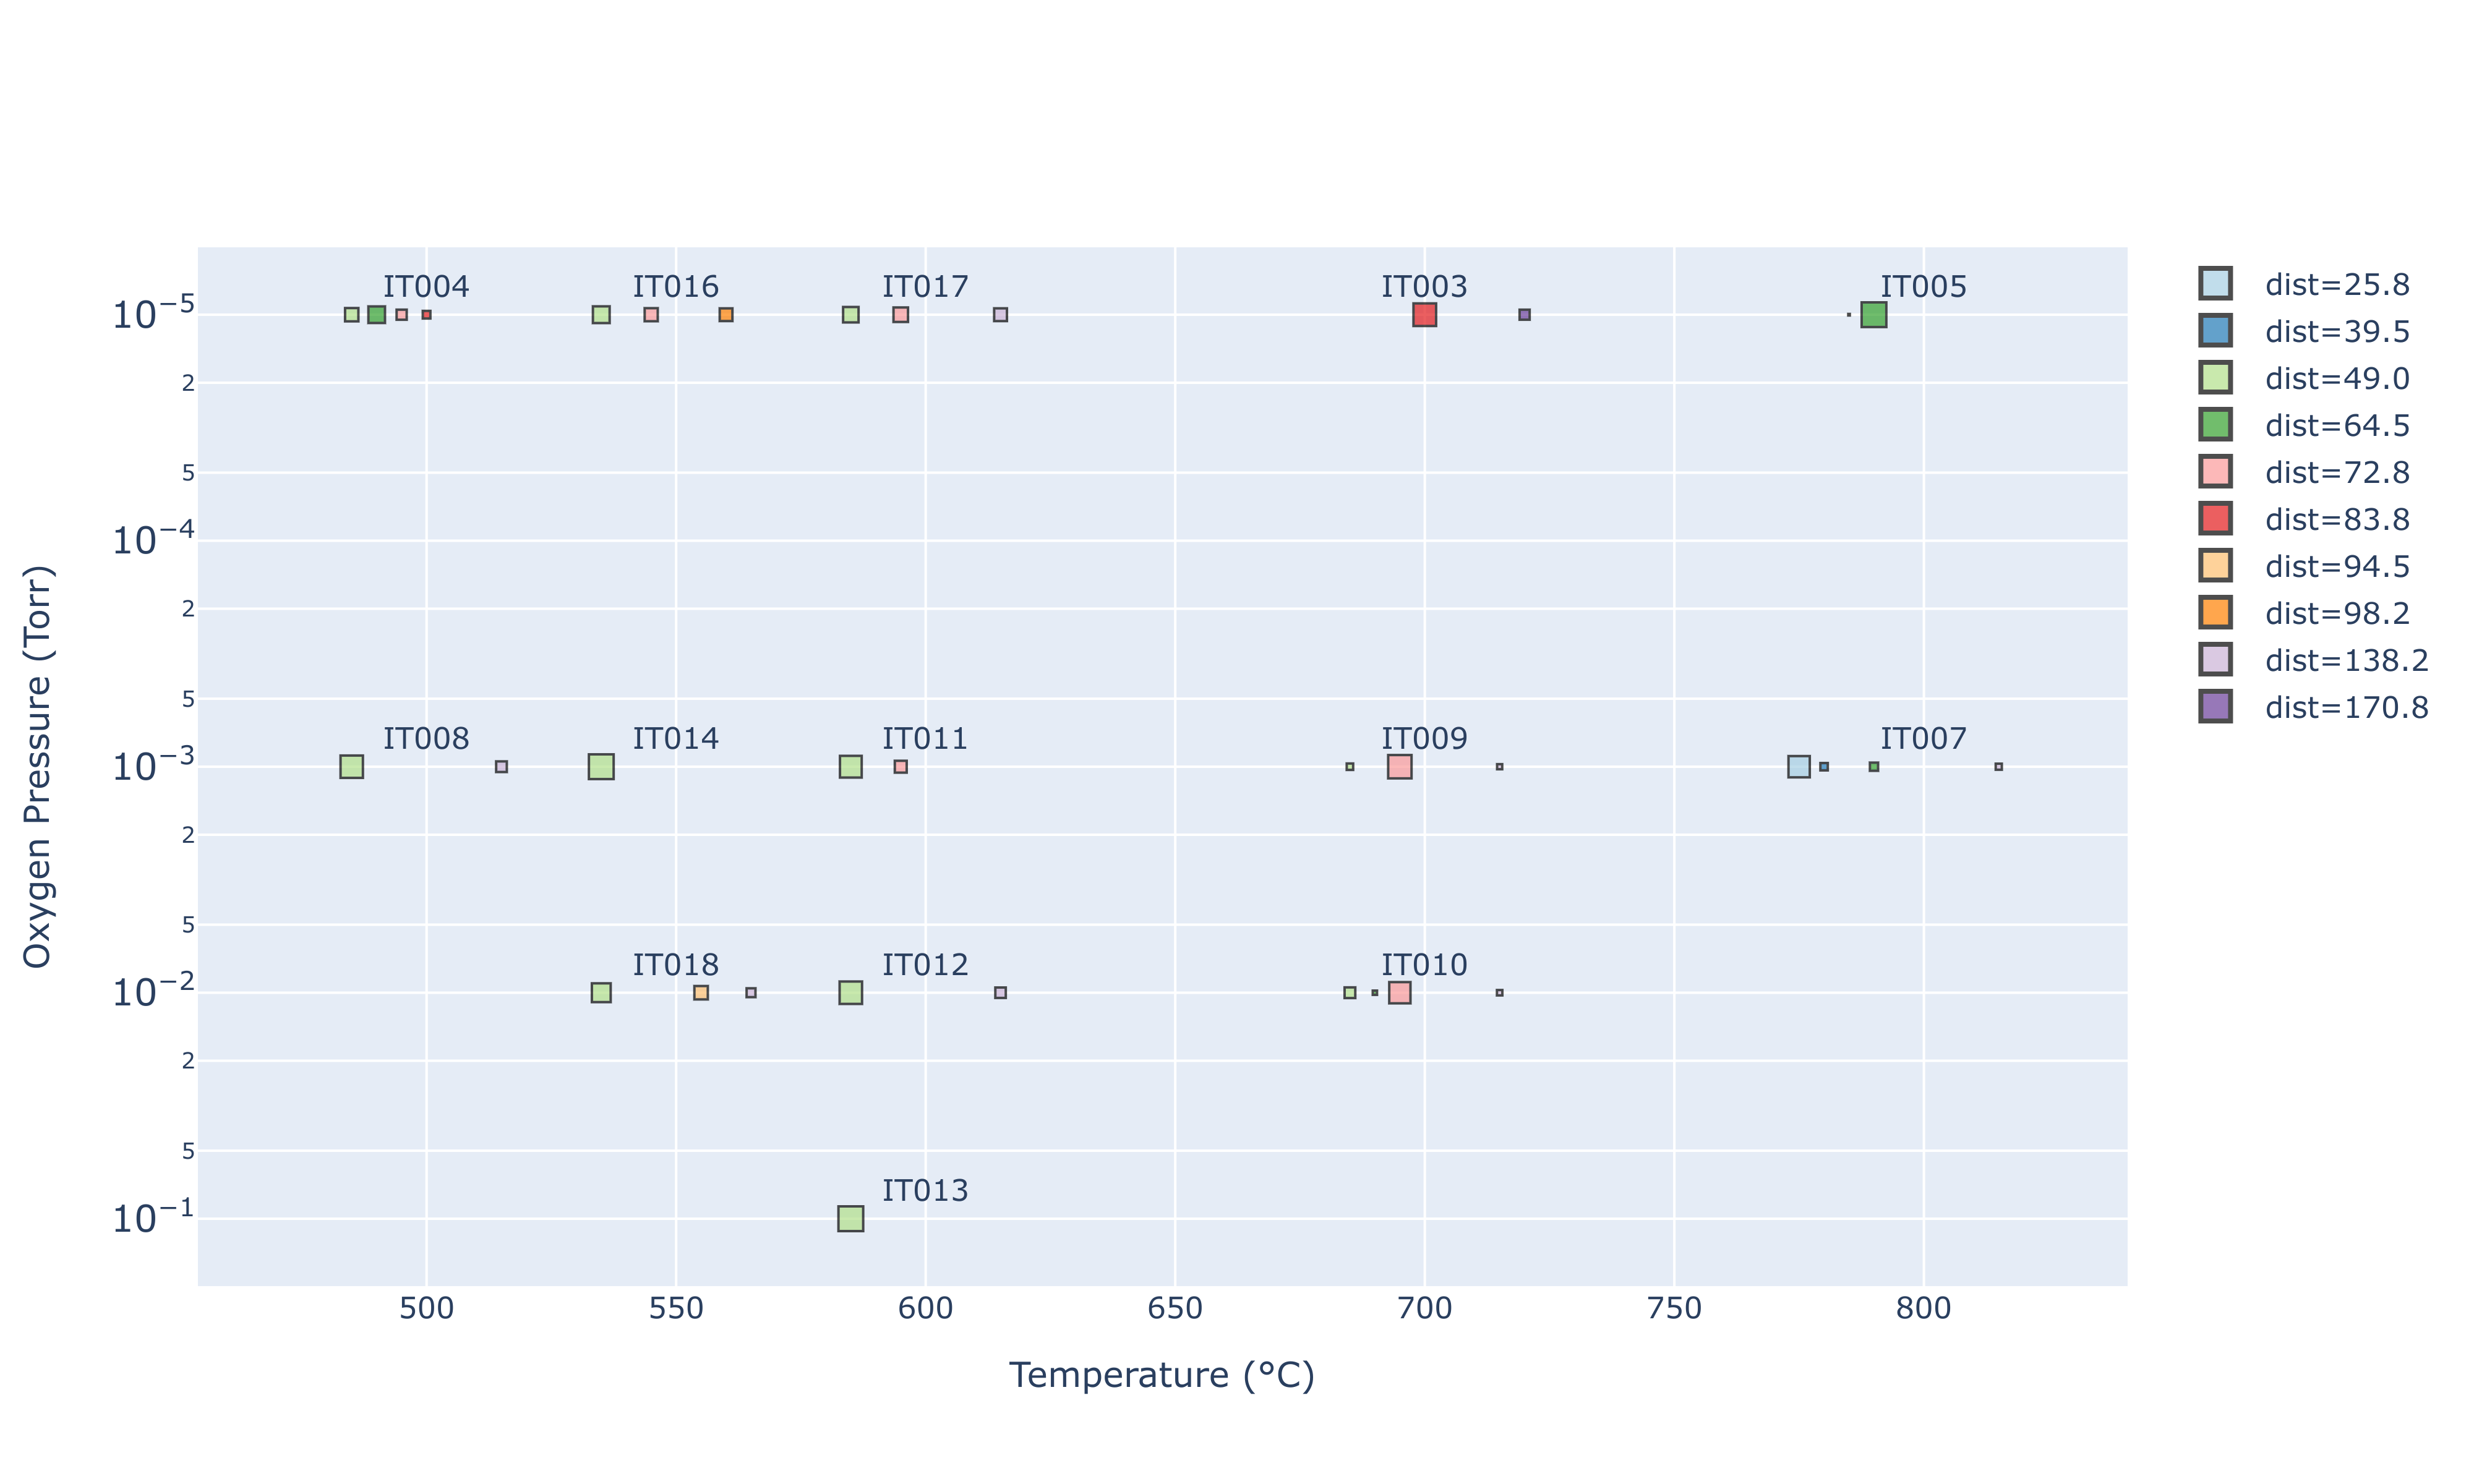

In [41]:
Image("2d3dprediction/phase/phase_with_intensity.png")

In [42]:
from analysis.rheeds import *

In [43]:
from analysis.kashiwa import *

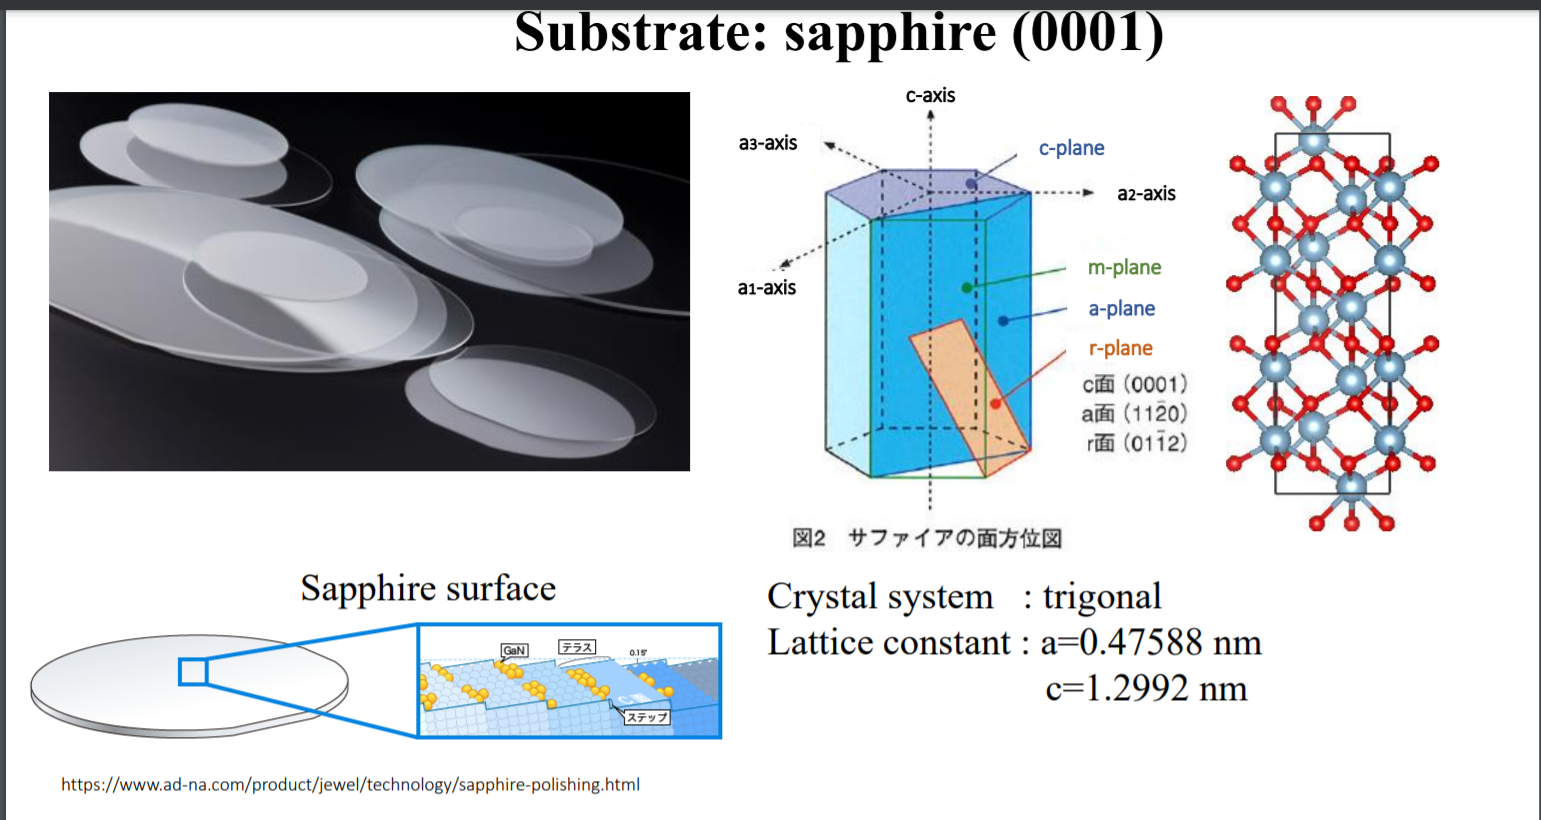

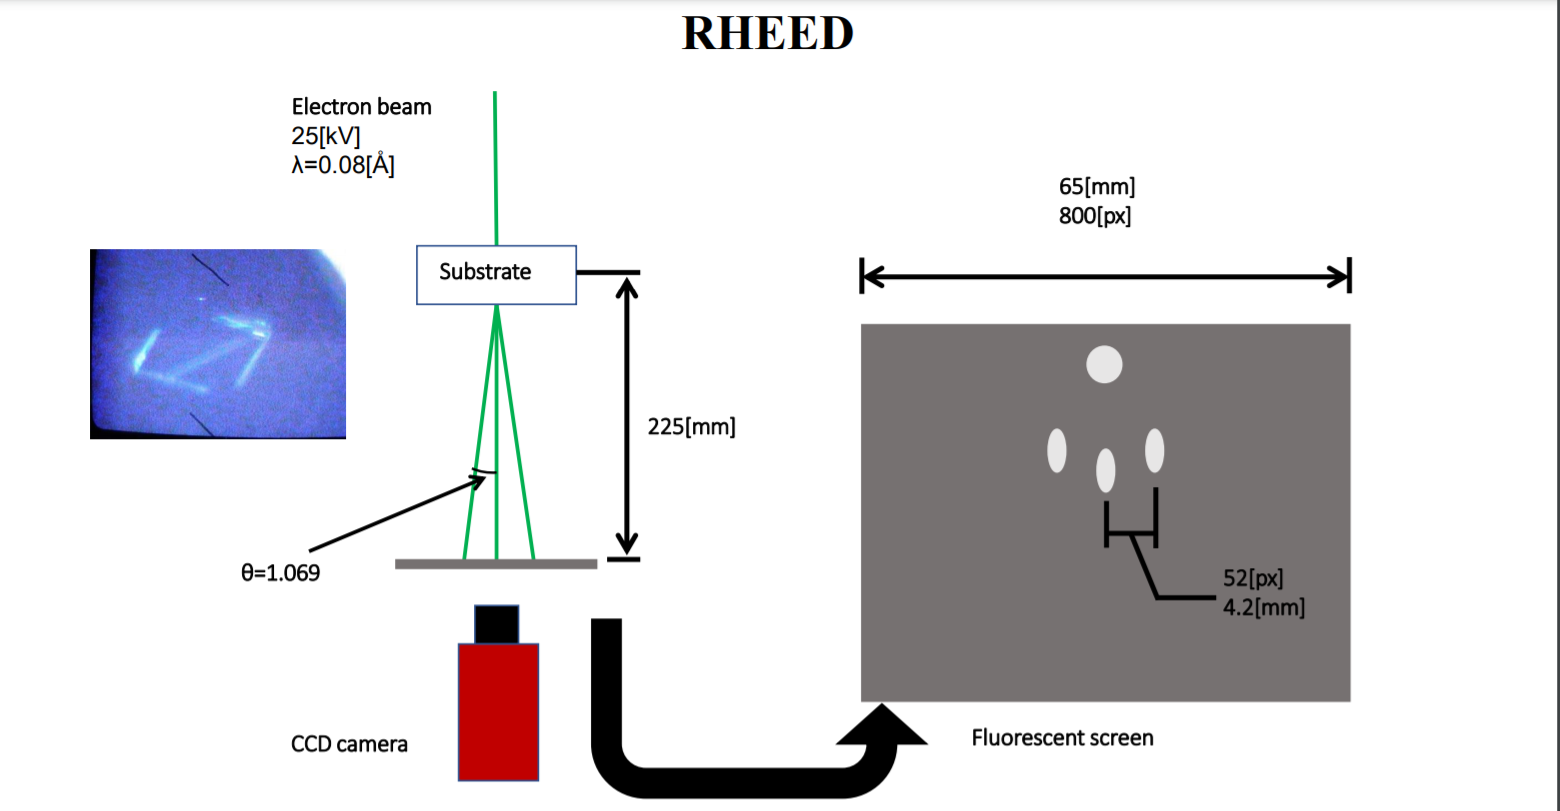

# Recalculate the wavelength

In [44]:
# me = 510998.946 # in electron volts / (the speed of light^2)
me = 9.10938356e-31 # in kilograms
# h = 4.1357e-15 # in eV s
h = 6.62607004e-34 #in m2 kg / s

In [45]:
E = 25e3 * 1.6022e-19
# E = 2 * 1.6022e-19

In [46]:
K = h / (me * np.sqrt( 2 * E / me ) ) * 1e10; K

0.07756542240588805

In [47]:
pc = 0.01

In [48]:
Es = np.linspace(25-25*pc, 25+25*pc, 100) * 1e3* 1.6022e-19

In [49]:
Ks = h / (me * np.sqrt( 2 * Es / me ) ) * 1e10

In [50]:
import matplotlib.pyplot as plt

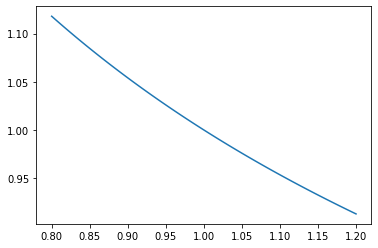

In [51]:
c = 0.2
s = 1 - c
e = 1 + c
plt.plot(np.linspace(s, e, 100), 1/np.sqrt(np.linspace(s, e, 100)) )

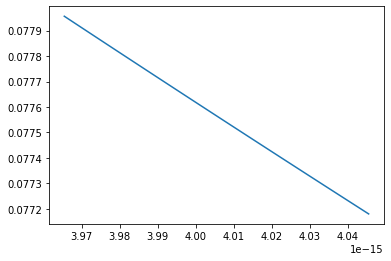

In [52]:
plt.plot(Es, Ks)

In [53]:
Ks.max() / K - 1, Ks.min() / K - 1

(0.005037815259212097, -0.004962809790010847)

# Calculate the substrate parameters

In [54]:
# all unit in length is in mm
config = RheedConfig(
    sub_ccd_dist = 225,
    pixel_real = 65 / 800,
    ccd_cam_width = 65,
    ccd_cam_height = 48.75,
    max_intensity = 16383,
    wave_length = 0.07756 * 1e-7,
)
#     wave_length = 0.08 * 1e-7


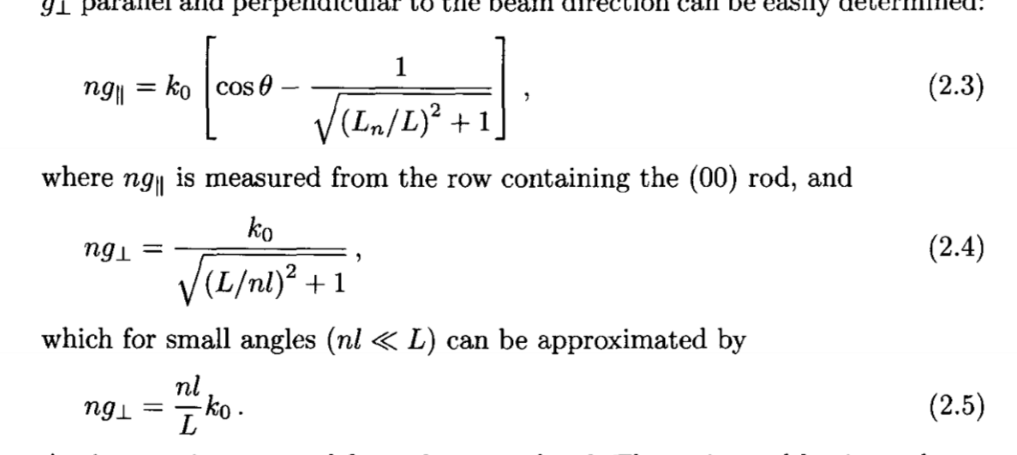

In [55]:
import numpy as np

In [56]:
def horizontal_distance(dist, config):
    real_dist = config.pixel_real * dist
    # print(real_dist)
    k0 = 2*np.pi/config.wave_length
    # print(k0)
    r = (config.sub_ccd_dist/real_dist)**2
    return k0 / np.sqrt( r + 1)

In [57]:
dg = horizontal_distance(52, config); dg

15209316.918279415

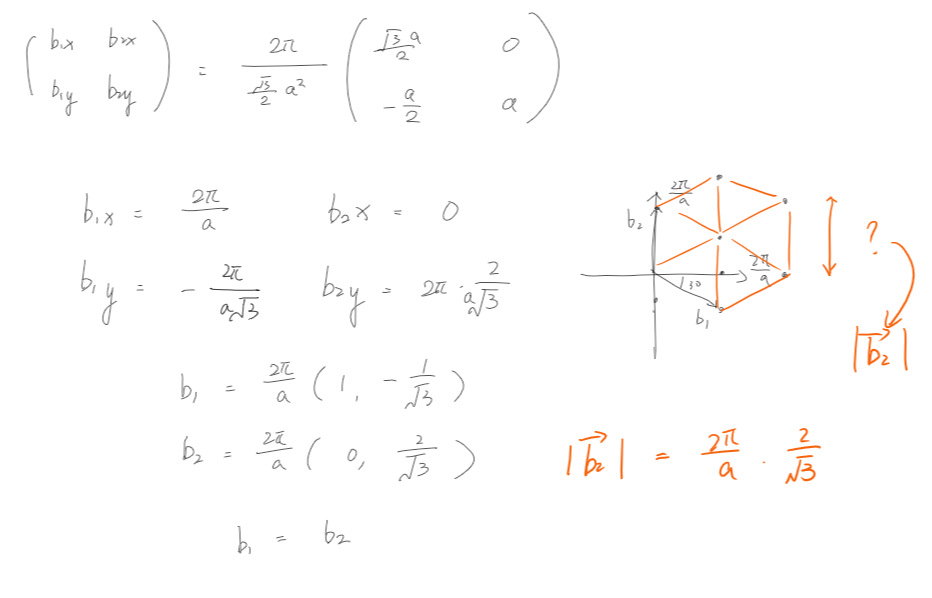

In [58]:
def _reci2real_hex_c_0010(dg):
    hex_a = 1 / ( dg / 2 / np.pi / (2/np.sqrt(3)) )
    return hex_a * 1e-3 * 1e10

In [59]:
hex_a = 1 / ( dg / 2 / np.pi / (2/np.sqrt(3)) )

In [60]:
hex_a= hex_a * 1e-3 * 1e10 # in A
hex_a

4.77023228322448

In [61]:
target_hex_a = 0.47588 * 10

In [62]:
hex_a

4.77023228322448

In [63]:
(hex_a - target_hex_a) / 4.77

0.002396705078507426

In [64]:
error = ((hex_a - target_hex_a) / target_hex_a) * 100
f"{error:.2}%"

'0.24%'

# Calculate what we found

In [65]:
ds = [25.8, 39.5, 49.0, 64.5, 72.8, 83.8, 94.5, 98.2, 138.2, 170.8]

In [66]:
dgs = [ horizontal_distance(d, config) for d in ds]

In [67]:
def _reci2real_iso(dg):
    return (1 / ( dg / 2 / np.pi )) * 1e-3 * 1e10

In [68]:
hex_as = [_reci2real_hex_c_0010(dg) for dg in dgs]

In [69]:
2*np.pi/dgs[0] * 1e-3 * 1e10

8.325227124336008

In [70]:
iso_as = [_reci2real_iso(dg) for dg in dgs]

In [71]:
print("spacing", "dG", "hex a", "fcc a", "iso a", sep="\t")
print("pixel", "nm-1", "A", "A", "A", sep="\t")
for d, dg, hex_a, iso_a in zip(ds, dgs, hex_as, iso_as):
    print(d, round(dg/1e6,2), round(hex_a, 2), round(hex_a*np.sqrt(2), 2) , round(iso_a, 2), sep="\t" )

spacing	dG	hex a	fcc a	iso a
pixel	nm-1	A	A	A
25.8	7.55	9.61	13.6	8.33
39.5	11.55	6.28	8.88	5.44
49.0	14.33	5.06	7.16	4.38
64.5	18.86	3.85	5.44	3.33
72.8	21.29	3.41	4.82	2.95
83.8	24.5	2.96	4.19	2.56
94.5	27.63	2.63	3.71	2.27
98.2	28.71	2.53	3.57	2.19
138.2	40.38	1.8	2.54	1.56
170.8	49.87	1.45	2.06	1.26


In [83]:
print("spacing", "dG", sep="\t")
print("pixel", "nm-1", sep="\t")
for d, dg, hex_a, iso_a in zip(ds, dgs, hex_as, iso_as):
    print(d, round(dg/1e6,2), sep="\t" )

spacing	dG
pixel	nm-1
25.8	7.55
39.5	11.55
49.0	14.33
64.5	18.86
72.8	21.29
83.8	24.5
94.5	27.63
98.2	28.71
138.2	40.38
170.8	49.87


In [72]:
indices, Fe2O3_dGs = generate_dGs(Fe2O3.lattice, n=2)

In [73]:
from sklearn.metrics import pairwise_distances

In [74]:
dgs

[7547163.835101631,
 11554092.474735022,
 14332139.372526065,
 18863612.362430137,
 21289442.01437864,
 24503503.261999644,
 27628798.79935703,
 28709228.258316178,
 40378558.96056508,
 49870795.15515314]

In [75]:
Fe2O3_dGs

array([0.        , 1.41219167, 1.41219167, 0.45408382, 2.44598773,
       1.48340064, 1.48340064, 2.48777975, 0.90816765, 2.82438335,
       2.82438335, 2.86065262, 3.73630797, 3.73630797, 1.67900381,
       2.86065262, 1.67900381, 3.76379986, 3.76379986, 2.60914247,
       2.96680127, 2.96680127, 4.89197546, 4.91300479, 3.84509633,
       3.84509633, 4.9755595 ])

In [87]:
print("Index", "G", sep="\t")
print("Miller", "nm-1", sep="\t")

for i in range(len(Fe2O3_dGs)):
    print( " ".join(map(str,indices[i])), round(Fe2O3_dGs[i]*10,2), sep="\t" )

Index	G
Miller	nm-1
0 0 0	0.0
1 0 0	14.12
0 1 0	14.12
0 0 1	4.54
1 1 0	24.46
0 1 1	14.83
1 0 1	14.83
1 1 1	24.88
0 0 2	9.08
0 2 0	28.24
2 0 0	28.24
0 2 1	28.61
1 2 0	37.36
2 1 0	37.36
0 1 2	16.79
2 0 1	28.61
1 0 2	16.79
1 2 1	37.64
2 1 1	37.64
1 1 2	26.09
2 0 2	29.67
0 2 2	29.67
2 2 0	48.92
2 2 1	49.13
1 2 2	38.45
2 1 2	38.45
2 2 2	49.76


In [76]:
x = np.array(dgs)/1e6
y = Fe2O3_dGs*10
exp_cif_simi = pairwise_distances( x[:,None], y[:,None] )

In [77]:
exp_cif_simi.shape

(10, 27)

In [78]:
thres = 0.5

idx= np.where( exp_cif_simi < thres )

In [79]:
exp_cif_simi[idx]

array([0.21022263, 0.21022263, 0.04362596, 0.37429426, 0.46539477,
       0.46539477, 0.10270204, 0.10270204, 0.11520011])

In [80]:
print("spacing", "dG", "Index", "dG", sep="\t")
print("pixel", "nm-1", "Miller", "nm-1", sep="\t")

for i, j in zip(*idx):
    print( ds[i], round(x[i],2), " ".join(map(str,indices[j])), round(y[j],2), sep="\t" )

spacing	dG	Index	dG
pixel	nm-1	Miller	nm-1
49.0	14.33	1 0 0	14.12
49.0	14.33	0 1 0	14.12
83.8	24.5	1 1 0	24.46
83.8	24.5	1 1 1	24.88
98.2	28.71	0 2 0	28.24
98.2	28.71	2 0 0	28.24
98.2	28.71	0 2 1	28.61
98.2	28.71	2 0 1	28.61
170.8	49.87	2 2 2	49.76


In [81]:
closed[ closed <= thres ] , closed_idx[closed <= thres]

NameError: name 'closed' is not defined

In [ ]:
y[closed_idx[closed <= thres]]

In [ ]:
x[closed <= thres]